In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# DATA HANDLING : QUANTIUM STORE ANALYSIS

## STATEMENT OF THE PROBLEM 

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

## OBJECTIVES 

+ present a strategic recommendation that is supported by data which can then be useed for the upcoming category review
+ analyse the data to understand the current purchasing trends and behaviours. 
+ customer segments and their chip purchasing behaviour.

#### In this file we are going to :

+ Clean the data
+ Analyse the data
+ Look for outliers
+ Data imputation ( if necessary )
+ merging the data 

## DATA HANDLING

### FILE 1 : TRANSACTION DATA

In [2]:
td = pd.read_excel("QVI_transaction_data.xlsx")
td1 = td.copy()
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


+ The above file contains the record of each and every transaction happened accross all the stores in quantium . 
+ All the transactions are related to chips and related products . 

+ There are 264836 entries or records indicating that 264836 transactions have been recorded.

#### Renaming the columns 

In [4]:
col_name = {'DATE':'Date', 'STORE_NBR': 'Store_no','LYLTY_CARD_NBR': 'Loyalty_card_no',
            'TXN_ID':'Tax_id', 'PROD_NBR': 'Prod_no' , 'PROD_NAME':'Prod_fullname',
            'PROD_QTY':'Prod_qty', 'TOT_SALES': 'Total_sales'}

td = td.rename(columns = col_name)

td.head(3)

,Date,Store_no,Loyalty_card_no,Tax_id,Prod_no,Prod_fullname,Prod_qty,Total_sales
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


#### Changing the datatype


In [5]:
td["Date"] =pd.to_datetime( td["Date"] ,unit = "D", origin = '1900-01-01')

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             264836 non-null  datetime64[ns]
 1   Store_no         264836 non-null  int64         
 2   Loyalty_card_no  264836 non-null  int64         
 3   Tax_id           264836 non-null  int64         
 4   Prod_no          264836 non-null  int64         
 5   Prod_fullname    264836 non-null  object        
 6   Prod_qty         264836 non-null  int64         
 7   Total_sales      264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


From this dataset we can identify that there are so many unique products to actually categorise and derive results .However, the products are asscociated with particular brand names. Thus, we can categories the Products into their brand names. 

#### Creating a Brand Name column and imputing it with brand names associated with the products

In [7]:
brand_names = [
    "Natural Chip Company", "CCs", "Smith's", "Kettle", "Old El Paso",
    "Grain Waves", "Doritos", "Twisties", "WW (Woolworths)", "Cheezels",
    "Infuzions", "Red Rock Deli", "Pringles", "Thins", "Burger Rings",
    "French Fries", "Cobs", "Tyrrells", "Sunbites", "Cheetos", "Tostitos"
]
# Defining a dictionary to map variations to the exact brand names
brand_variations = {
    "Natural Chip Company": ["Natural Chip Cmpny","NCC"
                             "Natural Chip Co", "Natural ChipCo", "Natural Chip" ],
    "CCs":["CC","CC's","CCs"], "Kettle":["Kettle","Kettles","Kettle's", "Kettle "], "Old El Paso": ["Old El Paso","OldElPaso"],
    "Doritos":["Doritos","Dorito's","Dorito"], "Twisties":["Twisties","Twistie's","Twistie"],
    "Pringles":[ "Pringles", "Pringle", "Pringle's"],"Cheezels":["Cheezels","Cheezel","Cheezel's"],
    "Thins":["Thins","Thin's","Thin"],"Burger Rings":["Burger Rings","BurgerRings","BurgerRing","Burger Ring"],
    "Cobs":["Cobs","Cob","Cob's"],"Cheetos":["Cheetos","Cheeto","Cheeto's"],
    "Tostitos":["Tostitos","Tostito","Tostito's"], "Tyrrells":["Tyrrells","Tyrrell's","Tyrrell"],
    "Sunbites": ['Sunbites','Sunbites','Snbts'], 
    "Infuzions": ["Infzns", "Infuzion", "Infusions"],
    "Smiths":["Smith's","Smith","Smiths"],
    "Red Rock Deli": ['Red Rock Deli',"RRD"],
    "Grain Waves":["Grnwves", "Grain Waves","Grainwaves","Grain Waves"],
    "WW (Woolworths)":["WW","Woolworths"]
}

# Create a new column initialized with "Others"
td['Brand'] = 'Others'

# Iterate over the brand variations dictionary
for brand_name, variations in brand_variations.items():
    # If variations are provided, check each variation
    if variations:
        for variation in variations:
            # Update 'brand' column if the variation is found in 'Prod_fullname'
            td.loc[td['Prod_fullname'].str.contains(variation, case=False), 'Brand'] = brand_name
    # If no variations are provided, directly update 'brand' column with brand name
    else:
        td.loc[td['Prod_fullname'].str.contains(brand_name, case=False), 'Brand'] = brand_name

In [8]:
td.head(3)

,Date,Store_no,Loyalty_card_no,Tax_id,Prod_no,Prod_fullname,Prod_qty,Total_sales,Brand
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Company
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths


In [9]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             264836 non-null  datetime64[ns]
 1   Store_no         264836 non-null  int64         
 2   Loyalty_card_no  264836 non-null  int64         
 3   Tax_id           264836 non-null  int64         
 4   Prod_no          264836 non-null  int64         
 5   Prod_fullname    264836 non-null  object        
 6   Prod_qty         264836 non-null  int64         
 7   Total_sales      264836 non-null  float64       
 8   Brand            264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.2+ MB


Now, we have successfully imputed the Brand names with no null values .

#### Outliers 

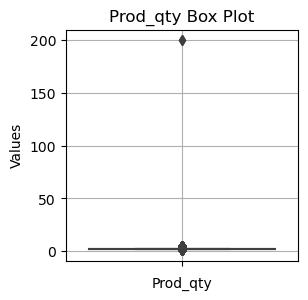

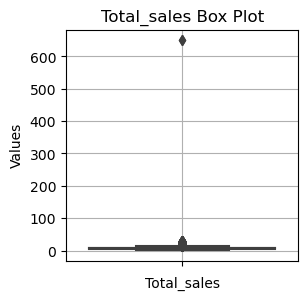

In [10]:
numeric_data = td[["Prod_qty","Total_sales"]]
for column in numeric_data.columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(y=numeric_data[column])
    plt.title(column + ' Box Plot')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

### FILE 2: PURCHASE BEHAVIOUR DATA

In [11]:
pb = pd.read_csv("QVI_purchase_behaviour.csv")
pb1 = pb.copy()
pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [12]:
pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


#### Renaming the columns

In [13]:
col_name_pb = {'LYLTY_CARD_NBR':'Loyalty_card_no','LIFESTAGE':'Lifestage','PREMIUM_CUSTOMER':'Affluence'}
pb = pb.rename(columns = col_name_pb)
pb.head(3)

,Loyalty_card_no,Lifestage,Affluence
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


#### Merging the data to create master table 

In [14]:
merged_data = pd.merge(td,pb, on = "Loyalty_card_no" , how = "left")

In [15]:
merged_data.head()

,Date,Store_no,Loyalty_card_no,Tax_id,Prod_no,Prod_fullname,Prod_qty,Total_sales,Brand,Lifestage,Affluence
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Company,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             264836 non-null  datetime64[ns]
 1   Store_no         264836 non-null  int64         
 2   Loyalty_card_no  264836 non-null  int64         
 3   Tax_id           264836 non-null  int64         
 4   Prod_no          264836 non-null  int64         
 5   Prod_fullname    264836 non-null  object        
 6   Prod_qty         264836 non-null  int64         
 7   Total_sales      264836 non-null  float64       
 8   Brand            264836 non-null  object        
 9   Lifestage        264836 non-null  object        
 10  Affluence        264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 22.2+ MB


In [17]:
merged_data.to_csv("QVI_cleaned_data.csv", index=False)